<a href="https://colab.research.google.com/github/nitinpatil301a/Deep-learning-youtube/blob/master/Boston_Dataset_regression_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.0.0
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
X=pd.DataFrame(boston.data,columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y=pd.DataFrame(boston.target,columns=['target'])
y.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X=pd.DataFrame(sc.fit_transform(X),columns=X.columns)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.2)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((404, 13), (404, 1), (102, 13), (102, 1))

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [0]:
model=Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(28,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))



In [0]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [10]:
history=model.fit(x_train,y_train,batch_size=10,epochs=100,validation_split=0.2)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

33/33 [==============================] - 0s 7ms/step - loss: 530.3576 - mse: 530.3576 - val_loss: 477.3438 - val_mse: 477.3438
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 385.8352 - mse: 385.8352 - val_loss: 223.3658 - val_mse: 223.3657
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 172.0244 - mse: 172.0244 - val_loss: 49.9112 - val_mse: 49.9112
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 100.4374 - mse: 100.

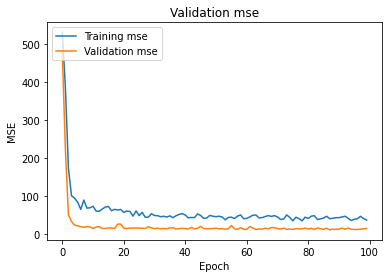

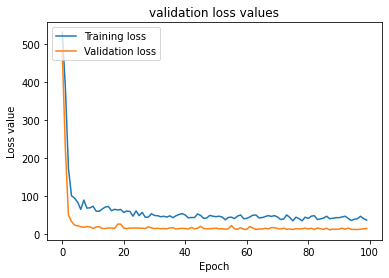

In [11]:
plt.plot(history.history['mse'], label='Training mse')
plt.plot(history.history['val_mse'], label='Validation mse')
plt.title('Validation mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [12]:
y_pred=model.predict(x_test)
y_pred

array([[28.239702],
       [21.415176],
       [22.258018],
       [17.156988],
       [ 8.502396],
       [22.308928],
       [16.738508],
       [26.349216],
       [47.05175 ],
       [23.232903],
       [12.215532],
       [21.54383 ],
       [21.318274],
       [15.182053],
       [22.891815],
       [25.546288],
       [18.753052],
       [10.010724],
       [ 9.50205 ],
       [11.46039 ],
       [33.01915 ],
       [22.415005],
       [16.112831],
       [19.42809 ],
       [10.118252],
       [18.430851],
       [16.839169],
       [28.905228],
       [15.425276],
       [16.613554],
       [18.8761  ],
       [23.861042],
       [18.645506],
       [27.985115],
       [17.378502],
       [36.120316],
       [31.40773 ],
       [ 9.351271],
       [42.502556],
       [32.775326],
       [31.408716],
       [15.488742],
       [49.74897 ],
       [19.137794],
       [34.43577 ],
       [15.268023],
       [24.843182],
       [18.04866 ],
       [17.353655],
       [19.234116],


In [13]:
score_eval=model.evaluate(x_test,y_test)
score_eval

4/4 [==============================] - 0s 2ms/step - loss: 20.6023 - mse: 20.6023


[20.60225486755371, 20.60225486755371]